Train: (140, 34020)
Test: (20, 34020)
Validation: (20, 34020)


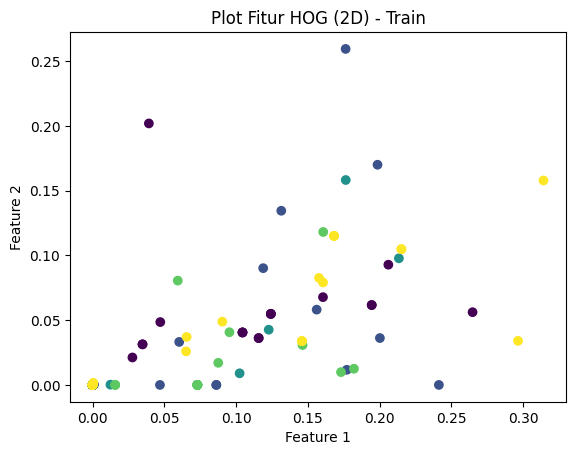

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

BASE = r"dataset/data_rupiah"

def load_images_with_label(path):
  data = []
  labels = []
  for label in os.listdir(path):
    folder = os.path.join(path, label)
    if not os.path.isdir(folder):
      continue
    for f in glob.glob(os.path.join(folder, "*.jpg")):
      img = cv2.imread(f)
      img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      img = cv2.resize(img, (128, 128))

      hog = cv2.HOGDescriptor()
      h = hog.compute(img).flatten()

      data.append(h)
      labels.append(int(label))

  return np.array(data), np.array(labels)

train_x, train_y = load_images_with_label(os.path.join(BASE, "train"))
test_x, test_y = load_images_with_label(os.path.join(BASE, "test"))
val_x, val_y = load_images_with_label(os.path.join(BASE, "validation"))

print("Train:", train_x.shape)
print("Test:", test_x.shape)
print("Validation:", val_x.shape)

plt.scatter(train_x[:, 0], train_x[:, 1], c=train_y, cmap='viridis')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Plot Fitur HOG (2D) - Train")
plt.show()

Jumlah koin terdeteksi (Edge): 8


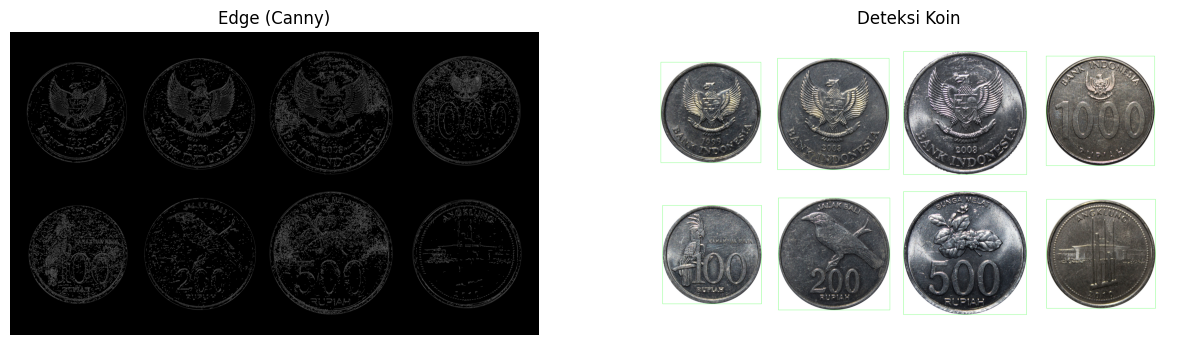

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_coins_edges(image_path):
  img = cv2.imread(image_path)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  # blur untuk stabilisasi tepi
  blur = cv2.GaussianBlur(gray, (5, 5), 1)

  # edge detection
  edges = cv2.Canny(blur, 60, 150)

  # perbesar sedikit agar kontur tertutup
  kernel = np.ones((3, 3), np.uint8)
  dilated = cv2.dilate(edges, kernel, iterations=2)

  # cari kontur berdasarkan tepi
  contours, _ = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  count = 0
  for cnt in contours:
    area = cv2.contourArea(cnt)
    if area < 500:  # filter noise kecil
      continue

    x, y, w, h = cv2.boundingRect(cnt)

    # bikin bounding box
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

    count += 1

  return img, edges, count

# contoh penggunaan
input_path = r"tests/test1.png"
result_img, edges_img, total = detect_coins_edges(input_path)

print("Jumlah koin terdeteksi (Edge):", total)

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.title("Edge (Canny)")
plt.imshow(edges_img, cmap='gray')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Deteksi Koin")
plt.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.show()
